In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
%matplotlib inline
from matplotlib.offsetbox import AnchoredText
from DSOhelper import addsubfiglabels,get_oscilloscope_data,getvoltage,plot_scope_data,subplot_scope_data

In [2]:
from scipy.signal import find_peaks

## determine the mean height of peaks vs overvoltage

In [3]:
datafolder = "overvoltage_apd2/"
files = sorted(os.listdir(datafolder))
file=files[0]
files

['1443v01_0000000.CSV',
 '1443v01_0000001.CSV',
 '1443v01_0000002.CSV',
 '1443v01_0000003.CSV',
 '1443v01_0000004.CSV',
 '1443v01_0000005.CSV',
 '1443v01_0000006.CSV',
 '1443v01_0000007.CSV',
 '1443v01_0000008.CSV',
 '1443v01_0000009.CSV',
 '1443v01_0000010.CSV',
 '1443v01_0000011.CSV',
 '1443v01_0000012.CSV',
 '1443v01_0000013.CSV',
 '1443v01_0000014.CSV',
 '1443v01_0000015.CSV',
 '1443v01_0000016.CSV',
 '1443v01_0000017.CSV',
 '1443v01_0000018.CSV',
 '1443v01_0000019.CSV',
 '1443v01_0000020.CSV',
 '1443v01_0000021.CSV',
 '1443v01_0000022.CSV',
 '1443v01_0000023.CSV',
 '1443v01_0000024.CSV',
 '1443v01_0000025.CSV',
 '1443v01_0000026.CSV',
 '1443v01_0000027.CSV',
 '1443v01_0000028.CSV',
 '1443v01_0000029.CSV',
 '1443v01_0000030.CSV',
 '1443v01_0000031.CSV',
 '1443v01_0000032.CSV',
 '1443v01_0000033.CSV',
 '1443v01_0000034.CSV',
 '1443v01_0000035.CSV',
 '1443v01_0000036.CSV',
 '1443v01_0000037.CSV',
 '1443v01_0000038.CSV',
 '1443v01_0000039.CSV',
 '1443v01_0000040.CSV',
 '1443v01_000004

In [4]:
dataseq,headers=get_oscilloscope_data(f"{datafolder}{file}")

In [5]:
headers

{1: {'Memory Length': 10000.0,
  'IntpDistance': 0.0,
  'Trigger Address': 4999.0,
  'Trigger Level': 0.16,
  'Source': 'CH1',
  'Vertical Units': 'V',
  'Vertical Units Div': 0.0,
  'Vertical Units Extend Div': 16.0,
  'Label': '',
  'Probe Type': 0.0,
  'Probe Ratio': 10.0,
  'Vertical Scale': 0.2,
  'Vertical Position': -0.712,
  'Horizontal Units': 'S',
  'Horizontal Scale': 5e-05,
  'Horizontal Position': 0.0,
  'Horizontal Mode': 'Main',
  'SincET Mode': 'Real Time',
  'Sampling Period': 5e-08,
  'Horizontal Old Scale': 5e-05,
  'Horizontal Old Position': 0.0,
  'Firmware': 'V1.23',
  'Mode': 'Fast'}}

In [6]:
headers[1]["Sampling Period"],headers[1]["Vertical Scale"]

(5e-08, 0.2)

### plotting a subset of data for sanity check

In [11]:
files[::100]

['1443v01_0000000.CSV',
 '1493v01_0000000.CSV',
 '1543v01_0000000.CSV',
 '1593v01_0000000.CSV',
 '1643v01_0000000.CSV']

CPU times: user 256 ms, sys: 3.87 ms, total: 259 ms
Wall time: 260 ms


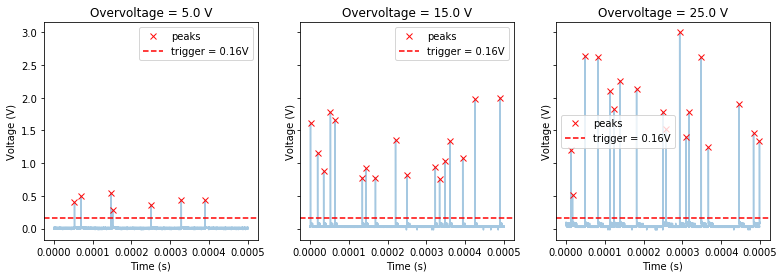

In [15]:
%%time
zeroOverVoltage = 139.3 
CH=1
fig,axx = plt.subplots(1,3,figsize=(13,4),sharey=True)
for ax,file in zip(axx,['1443v01_0000000.CSV','1543v01_0000000.CSV','1643v01_0000000.CSV']) :
    dataseq,headers=get_oscilloscope_data(f"{datafolder}{file}")
    ax.set_title(f"Overvoltage = {int(file[:4])/10-zeroOverVoltage} V")
    subplot_scope_data(dataseq,headers,ax,alpha=0.4)
    peak_x , peak_heights = find_peaks(dataseq[CH],height=10)
    ax.plot(peak_x*headers[CH]["Sampling Period"],getvoltage(peak_heights["peak_heights"],headers[CH]),"x",c="r",alpha=0.96,label="peaks")
    ax.axhline(headers[CH]["Trigger Level"],c="r",ls="--",label=f"trigger = {headers[CH]['Trigger Level']}V")
    ax.legend()
    ax.set_ylabel("Voltage (V)")
    ax.set_xlabel("Time (s)")
plt.savefig("results06_01_samplesignal.png")

In [16]:
%%time
heights=dict()
for file in files[::1]:
    CH=1
    dataseq,headers=get_oscilloscope_data(f"{datafolder}{file}")
    peak_x , peak_heights = find_peaks(dataseq[CH],height=10)
    if not file[:4] in heights:
        heights[file[:4]]=[]
    [heights[file[:4]].append(v) for v in getvoltage(peak_heights["peak_heights"],headers[CH])]

CPU times: user 3.54 s, sys: 80.6 ms, total: 3.62 s
Wall time: 3.73 s


1443 569
1493 1151
1543 1615
1593 2013
1643 2328
CPU times: user 167 ms, sys: 4.11 ms, total: 172 ms
Wall time: 168 ms


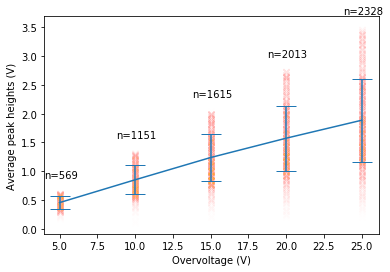

In [17]:
%%time
fig,ax = plt.subplots()
plottingvals = []
for key , vals in heights.items():
    print(key,len(vals))
    ax.scatter([int(key)/10-zeroOverVoltage]*len(vals),vals,alpha=0.005,color="orange",marker="x")
    plottingvals.append((int(key)/10,np.mean(vals),np.std(vals)))
    ax.text(int(key)/10-zeroOverVoltage+0.1,max(vals)+0.25,f"n={len(vals)}",ha="center")
plottingvals=np.array(plottingvals)
#ax.plot(plottingvals[:,0]-zeroOverVoltage,plottingvals[:,1],"x-")
ax.errorbar(plottingvals[:,0]-zeroOverVoltage,plottingvals[:,1],yerr=plottingvals[:,2], capsize=10)
ax.set_xlabel("Overvoltage (V)")
ax.set_ylabel("Average peak heights (V)")
plt.savefig("results06_02_OvervoltageVSHeights.png")